<h1>Marriage Lemma Project</h1>

<h2>Robert Aroutiounian, Thomas Clarke, Ty Danet</h2>

In [247]:
%matplotlib inline

In [248]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.special import comb

In [249]:
# sets size of figures in notebook
matplotlib.rcParams['figure.figsize'] = [10, 8]

In [250]:
def adjMatrix(shape, edges):
    ''' Creates an adjacency matrix
        shape has the form (x, y) where x and y are integers
        edges 
    '''

    # initialize adjacency matrix as mxn matrix of 0s
    matrix = np.zeros(shape)
    
    # iterate through each connection
    for x, y in edges:
        # set it to 1 in the matrix
        matrix[x, y] = 1
    
    return matrix
            
def plotBipartite(adj, color='b--', show=True):
    m, n = adj.shape

    for i in range(m):
        # plot vertices on top
        plt.scatter([i, i], [1, 0], c='r', zorder=2)
        
        for j in range(n):
            if adj[i, j] == 1:
                # plot connections under vertices
                plt.plot([i, j], [1, 0], color, zorder=1)

    if show:
        plt.show()
    

<h1>Bipartite Graph</h1><br>
<p>
    A bipartite graph, also called a bigraph, is a set of graph vertices decomposed into two disjoint sets such that no two graph vertices within the same set are adjacent.
</p>

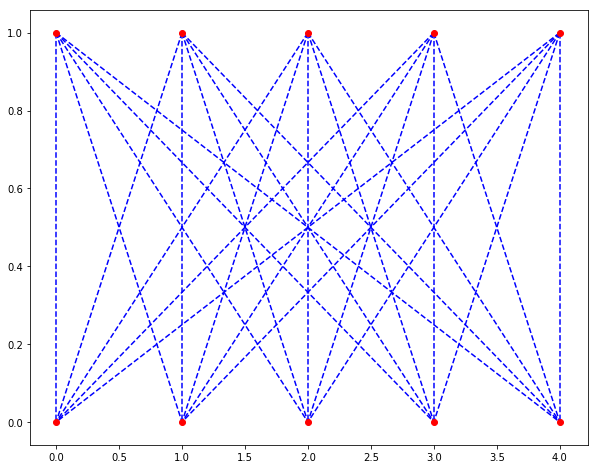

In [251]:
plotBipartite(np.ones((5,5)))

<h1>Perfect Matching</h1>
<br>
A perfect matching of a graph is a matching (i.e. an independent edge set) in which every vertex of the graph is incident to exactly one edge of the matching.

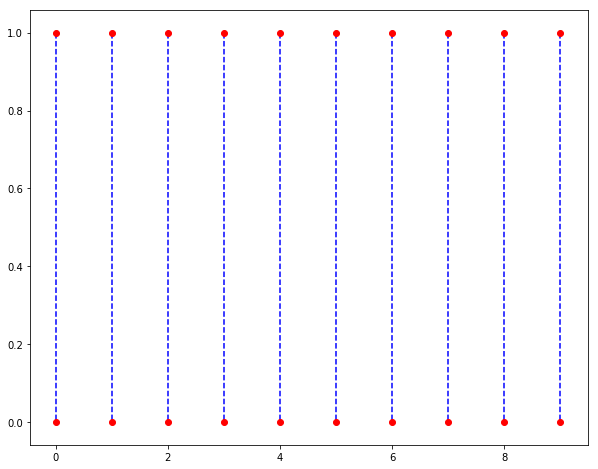

In [252]:
edges = [(i, i) for i in range(10)]
G = adjMatrix((10,10), edges)
plotBipartite(G)

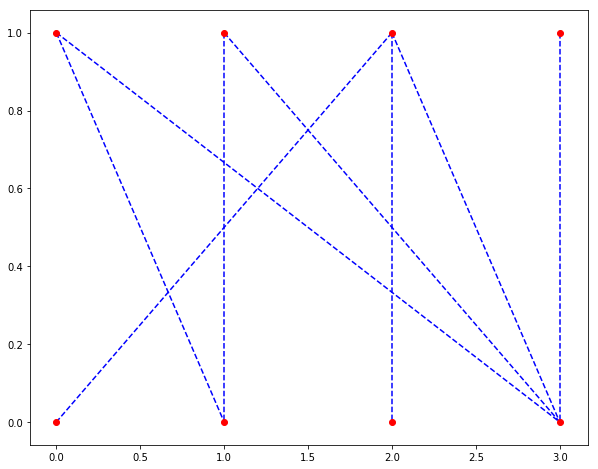

In [253]:
edges = [(0,1), (0,3),
         (1,1), (1,3),
         (2,0), (2,2), (2,3),
         (3,3)]

G = adjMatrix((4,4), edges)
plotBipartite(G)

<h2>Does the above graph have a perfect matching?</h2>

In [254]:
def hallsTheorem(adjacencies):
    ''' Hall's Marriage Theorem implemented using adjacency matrices and stacks
        Not optimized with memoization so is likely very slow for n > 8
    '''
    
    # stack starts off with the original problem
    stack = [adjacencies]
    # removedstack is not necessary for algorithm correctness
    # it's needed for pleasing visualizations
    removedstack = [[]]
    
    while stack: # while the stack is not empty
        matrix = stack.pop(-1) # pop subproblem off of the stack
        removed = removedstack.pop(-1) # pop subproblem's removed indices off of the removed stack
        
        m, n = matrix.shape # subproblem size is dictated by number of columns n

        if neighbors(matrix) < n: # N(X) < |X|
            conflict = np.copy(matrix) # create conflict matrix, only needed for visualization
            
            for idx in removed[::-1]: # go through each removed column index in reverse order
                conflict = np.insert(conflict, idx, 0, axis=1) # place removed columns back in as columns of 0s
                
            print('Perfect matching does not exist for this graph.')
            plotBipartite(adjacencies, show=False) # plot original bipartite graph
            plotBipartite(conflict, color='r--') # plot conflict on top
            return

        if n > 1: # only split into subproblems if subproblem size is greater than 1
            for i, submatrix in enumerate(subMatrices(matrix)):
                stack.append(submatrix) # push subproblem onto the stack
                removedstack.append(removed + [i]) # push removed column indices onto the removed stack

    print('Perfect matching exists for this graph.')
    
def subMatrices(matrix):
    ''' Helper function for Hall's Marriage Theorem
        Returns each submatrix that can be made by removing a single column
    '''
    
    m, n = matrix.shape
    matrices = []

    for i in range(n):
        # create subproblem with i'th column removed
        submatrix = np.delete(matrix, i, axis=1)
        matrices.append(submatrix)

    # return each subproblem in a list
    return matrices

def neighbors(adj):
    ''' Helper function for Hall's Marriage Theorem
        Returns the number of neighbors a subproblem contains
    '''
    
    vals = sum(adj.T)
    vals = list(filter(lambda x: x != 0, vals))

    return len(vals)


<h1>Hall's Marriage Theorem</h1><br>
Suppose $G$ is a bipartite graph with bipartition $(A, B)$. There is a matching that covers $A$ if and only if for every subset $X \subseteq A$, $N(X) \ge |X|$ where $N(X)$ is the number of neighbors of $X$.

Perfect matching does not exist for this graph.


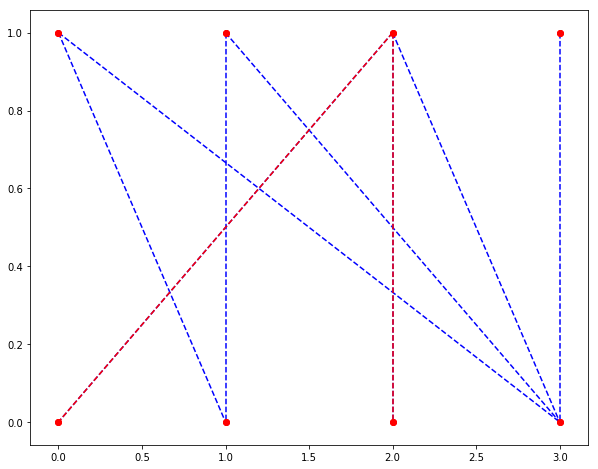

In [255]:
hallsTheorem(G)

We see that the first and third vertices on the bottom row of the graph want the third vertex on the top row and only the third vertex on the top row. Since they both cannot be matched with the same vertex, the matching fails.

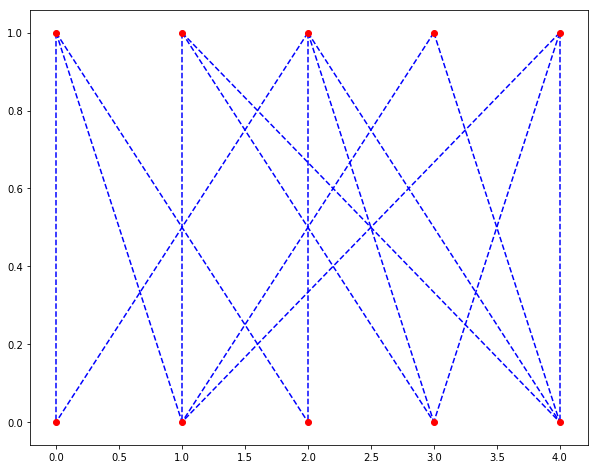

Perfect matching exists for this graph.


In [269]:
rand = np.random.randint(0, 2, size=(5,5))
plotBipartite(rand)
hallsTheorem(rand)

<h1>Running Time of Unoptimized Algorithm</h1><br>
Starting from $n=2$ we get the number of splits required as the sequence $\{a_n\}=\{1, 4, 17, 86, 517, \ldots \}$ which can be defined through the recurrence relation $$a_n=na_{n-1}+1$$ $$a_2=1$$ which in turn has the closed form $$a(n)=\sum_{k=2}^n\frac{n!}{k!}=O(n!)$$

<h1>Running Time of Optimized Algorithm</h1><br>
Starting from $n=2$ we get the number of unique computations required as the sequence $\{b_n\}=\{1, 4, 11, 26, 57, \ldots \}$ which can be defined as $$b(n)=\sum_{k=2}^n\binom{n}{k}=2^n-(n+1)=O(2^n)$$

In [257]:
def unique(n):
    ''' Returns the number of unique computations
        done by the matrix algorithm for finding
        the existance of a perfect matching in a
        bipartite graph on 2n vertices
    '''
    
    assert n > 1
    
    return sum([comb(n, k) for k in range(2, n+1)])

def total(n):
    ''' Returns the total number of computations
        done by the matrix algorithm for finding
        the existance of a perfect matching in a
        bipartite graph on 2n vertices
    '''
    
    assert n > 1
    
    return sum([np.math.factorial(n)/np.math.factorial(k) for k in range(2, n+1)])

In [258]:
x = 10

In [259]:
ucomp = lambda x: [unique(k+2) for k in range(x)]
ucomp(x)

[1.0, 4.0, 11.0, 26.0, 57.0, 120.0, 247.0, 502.0, 1013.0, 2036.0]

In [260]:
tcomp = lambda x: [total(k+2) for k in range(x)]
tcomp(x)

[1.0, 4.0, 17.0, 86.0, 517.0, 3620.0, 28961.0, 260650.0, 2606501.0, 28671512.0]

In [261]:
ratio = lambda x: [unique(k+2)/total(k+2) for k in range(x)]
ratio(x)

[1.0,
 1.0,
 0.6470588235294118,
 0.3023255813953488,
 0.1102514506769826,
 0.03314917127071823,
 0.008528711025171783,
 0.0019259543449069634,
 0.0003886436260718872,
 7.101125326072793e-05]

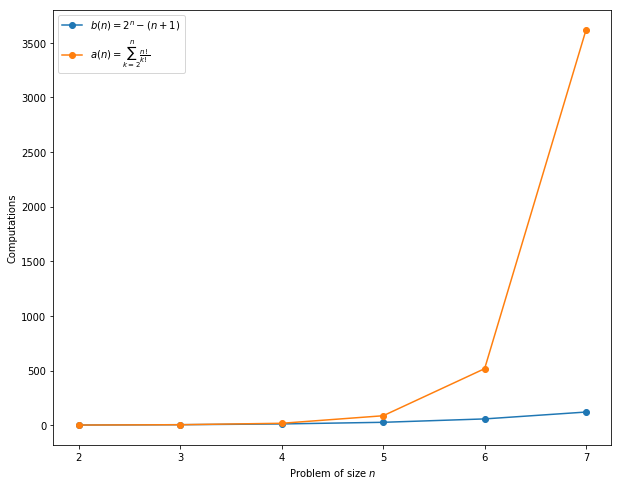

In [262]:
k = 6
plt.plot(range(2, k+2), ucomp(k), '-o', label='$b(n)=2^n-(n+1)$')
plt.plot(range(2, k+2), tcomp(k), '-o', label='$a(n)=\\sum_{k=2}^n\\frac{n!}{k!}$')
plt.xlabel('Problem of size $n$')
plt.ylabel('Computations')
plt.legend()

This graph shows the running times of the matrix algorithm above. The orange plot is the unoptimized algorithm. The algorithm is essentially tree-recursive, and each subtree is unaware of the computations done by the others. This causes the same subproblems to recalculated unnecessarily. The blue plot is the expected running time if memoization were to be implemented. 

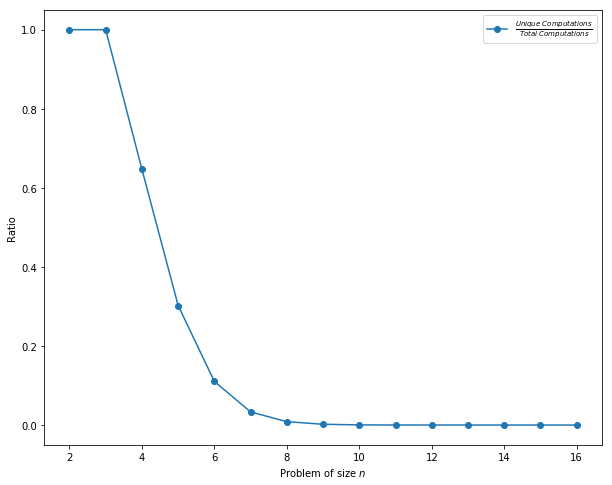

In [263]:
k = 15
plt.plot(range(2, k+2), ratio(k), '-o', label='$\\frac{Unique\\ Computations}{Total\\ Computations}$')
plt.xlabel('Problem of size $n$')
plt.ylabel('Ratio')
plt.legend()

Plot that simply shows that the optimized algorithm is all-around better, either doing the same number of computations or significantly less as $n$ grows.